This final project will be graded by your peers who are completing this course during the same session. This project is worth 25 marks of your total grade, broken down as follows:

    Building model using KNN, finding the best k and accuracy evaluation (7 marks)
    Building model using Decision Tree and find the accuracy evaluation (6 marks)
    Building model using SVM and find the accuracy evaluation (6 marks)
    Building model using Logistic Regression and find the accuracy evaluation (6 marks)

In [1]:
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

--2020-12-02 16:32:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33426 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  32.64K  --.-KB/s    in 0.1s    

2020-12-02 16:32:48 (329 KB/s) - ‘Cust_Segmentation.csv’ saved [33426/33426]



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

In [5]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [6]:
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [7]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda5fc08410>]],
      dtype=object)

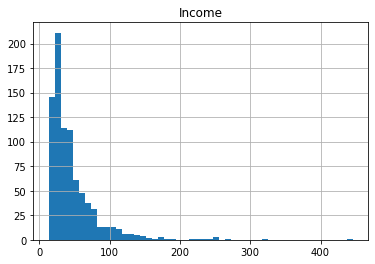

In [9]:
df.hist(column='Income', bins=50)

In [14]:
X = df[['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio']] .values  #.astype(float)
X[0:5]

array([[1, 41, 2, 6, 19, 0.124, 1.073, 0.0, 'NBA001', 6.3],
       [2, 47, 1, 26, 100, 4.582, 8.218, 0.0, 'NBA021', 12.8],
       [3, 33, 2, 10, 57, 6.111000000000001, 5.8020000000000005, 1.0,
        'NBA013', 20.9],
       [4, 29, 2, 4, 19, 0.6809999999999999, 0.516, 0.0, 'NBA009', 6.3],
       [5, 47, 1, 31, 253, 9.308, 8.908, 0.0, 'NBA008', 7.2]],
      dtype=object)

In [12]:
y = df['Defaulted'].values
y[0:5]

array([0., 0., 1., 0., 0.])

In [17]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [18]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
